# Will they buy next time or not?
Link for the oral presentation: [our presentation](https://drive.google.com/file/d/1pY_xtpcWmIFuYsvWaw_1xEvBBoQhk5SD/view?usp=sharing)

link for the slides: [slides](https://docs.google.com/presentation/d/1CHkARAu-7_FzeRDzcYn63kLbYFs34scHGunCp_MhFog/edit?fbclid=IwAR2jigf9PjY5RHw7Cr15Upu3XVch2XNk5Vwi3ibSQ1KIjBVWRePQjk4QuzY#slide=id.ge9090756a_1_58)
# Section 1: Data description
This dataset is about online food delivery in Bangalore,India. It was collected by Ben Roshan in 2020 as a part of his masters thesis. It has 388 observations which are bangalorean consumers and 55 features based on the following titles:

• Demographics of consumers

• Overall/general purchase decision

• Time of delivery influencing the purchase decision

• Rating of Restaurant influencing the purchase decision


# Section 2: Problem statement:
There has been a rise in the demand of online delivery in the metropolitan cities such as
Bangalore in India. based on this dataset we can study consumers' preferences,reviews and check Which region demands heavily. In this work, we will be making some classification models to answer the question of  whether or not a consumer 
 will order again and what explains his/her behaviour.

# Section 3: Technical information:
We used python for our analysis since it is an easy scripting language and it has great community.

***1/ Packages and libraries:***

**Pandas** :
Pandas is a used for manipulating data and data analysis in python.

**Matplotlib & Seaborn**:
Matplotlib & Seaborn are great libraries for vizualizing data. While Matplotlib is for basic graphs,
seaborn is for advanced graphs.

**Sci-kit Learn**:
Sci-kit Learn is a great machine learning library. It provides many machine learning algorithms as well
as metrics for evaluation, splitting dataset function and preprocessing data function.

**Graphviz:**
graphviz is a library used to vizualize the decision tree

***2/ Statistical tools:***
### Logistic regression
logistic regression is known for its powerful preformance for binary classification. It is usually the first model to try when performing such task that's why we'll begin by this algorithm
### Decision trees:
The reason for this choice is to get a vizualization of the
tree and get a sense of what actually make a prediction. The real goal here is to get
interpretations and not accurate predictions. That's why we'll focus here on the training set
because decision trees are known for overfitting.
###Random Forest:
Random decision forests are an ensemble learning method for classification, regression and
other tasks that operates by constructing a multitude of decision trees at training time. For
classification tasks, the output of the random forest is the class selected by most trees. It usually
provides better results than single decision trees
#### Support vector machine: 
it is a supervised learning algorithm mostly used for classification but
it can be used also for regression. The main idea is that based on the labeled data (training data)
the algorithm tries to find the optimal hyperplane which can be used to classify new data points.
In two dimensions the hyperplane is a simple line. This was our final attempt to improve our
prediction accuracy.


In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sentiment_analyzer import model,vect

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Section 4: Data Analysis

# Import Data and Explore It

In [2]:
df=pd.read_csv("onlinedeliverydata.csv")
df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,...,Important,Important,Important,Important,Important,Important,Important,Important,Yes,Nil
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,...,Moderately Important,Very Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Very Important,Very Important,Yes,Nil
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,...,Important,Very Important,Important,Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,...,Important,Very Important,Important,Very Important,Very Important,Important,Very Important,Very Important,Yes,Language barrier is also one major issue. Mosl...


We will be taking a look on the data :

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        388 non-null    int64  
 1   Gender                                     388 non-null    object 
 2   Marital Status                             388 non-null    object 
 3   Occupation                                 388 non-null    object 
 4   Monthly Income                             388 non-null    object 
 5   Educational Qualifications                 388 non-null    object 
 6   Family size                                388 non-null    int64  
 7   latitude                                   388 non-null    float64
 8   longitude                                  388 non-null    float64
 9   Pin code                                   388 non-null    int64  
 10  Medium (P1)               

### we don’t have any missing values in all features but in reviews. We will deal with this issue when using the sentiment analyser.
 ### we can see the  type of each feature to get a grip about our data.

 ## we won't use all features (customer preferences in time and coordination and all), We focused on the outers to generate our models such as :  'Age', 'Family size', 'Gender', 'Occupation', 'Marital Status', 'Educational Qualifications', 'Medium (P1)', 'Meal(P1)', 'Perference(P1)', 'Reviews



### Next, We'll see what type of customers were interviewed and we'll visualize the results.

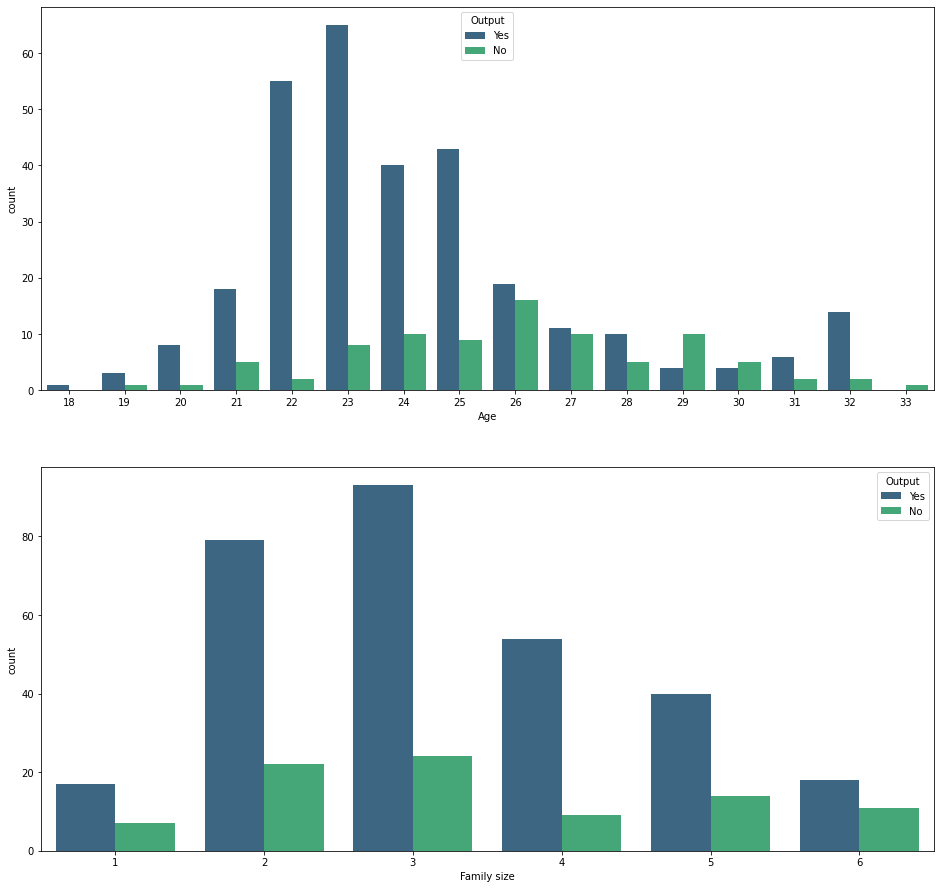

In [4]:
%matplotlib inline

_ = [0, 6]
_ = list(enumerate([list(df.columns)[i] for i in _], start=1))

fig = plt.figure(figsize=[16,24])
for index, col_name in _:
    ax = fig.add_subplot(3, 1, index)    
    sns.countplot(x=col_name, data=df, hue='Output', palette='viridis')

### There are no extreme values in both continuous variables (age and family size), hence we do not need to treat the data for outliers. We can also see that reordering is more prevalent in age groups less than 25, and family size of less than 4.
### this was expected as we know that young adults are more likely to order food online

In [5]:
df["Gender"].value_counts()

Male      222
Female    166
Name: Gender, dtype: int64

In [6]:
df["Occupation"].value_counts()

Student           207
Employee          118
Self Employeed     54
House wife          9
Name: Occupation, dtype: int64

In [7]:
df["Marital Status"].value_counts()

Single               268
Married              108
Prefer not to say     12
Name: Marital Status, dtype: int64

In [8]:
df["Educational Qualifications"].value_counts()

Graduate         177
Post Graduate    174
Ph.D              23
School            12
Uneducated         2
Name: Educational Qualifications, dtype: int64

In [9]:
df["Medium (P1)"].value_counts()

Food delivery apps    358
Walk-in                22
Direct call             5
Web browser             3
Name: Medium (P1), dtype: int64

In [10]:
df["Meal(P1)"].value_counts()

Snacks       124
Lunch        120
Dinner        91
Breakfast     53
Name: Meal(P1), dtype: int64

In [11]:
df["Perference(P1)"].value_counts()

Non Veg foods (Lunch / Dinner)            315
Veg foods (Breakfast / Lunch / Dinner)     69
Sweets                                      3
Bakery items (snacks)                       1
Name: Perference(P1), dtype: int64

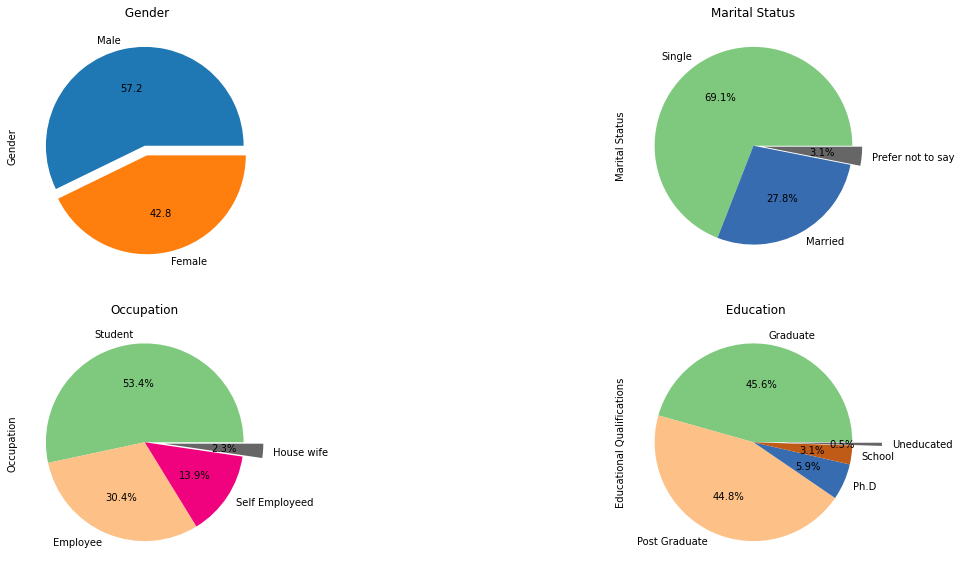

In [12]:
plt.figure()
plt.subplot(221)
df['Gender'].value_counts().plot.pie(title=' Gender',figsize=(20,10),autopct="%1.1f",explode=[0,.1])
plt.subplot(222)
df['Marital Status'].value_counts().plot.pie(title='Marital Status',cmap="Accent",autopct="%1.1f%%",explode=[0,0,0.1])
plt.subplot(223)
df['Occupation'].value_counts().plot.pie(title='Occupation',cmap="Accent",autopct="%1.1f%%",explode=[0,0,0,0.2])
plt.subplot(224)
df['Educational Qualifications'].value_counts().plot.pie(title=' Education',cmap="Accent",autopct="%1.1f%%",explode=[0,0,0,0,0.3])

the pie charts show that out of the people surveyed, 57.2% are male and 42% are female. It is
quite a similar amount.
They also show that 69.1% of them are single whilst 27.8% are married and the other 3.1%
prefer not to say. We can say that single people are the ones who are most likely to order food.
The graphs also show that the majority of the people presented in the dataset are students with
53.4%, a total of 30.4% are employees, 13.9% are self-employed and the other 2.3% are
housewives (unemployed) which can be interpreted as most people who order food online are
students.
the results given also show that the majority of people surveyed are educated with 45.6%
graduates, 44.8% postgraduates, 5.9% Ph.D. students, and 3.1% at school, whereas 0.5% are
uneducated.

### Then, we tried to extract information about the types of meals that are ordered the most,meals preferences and medium status:

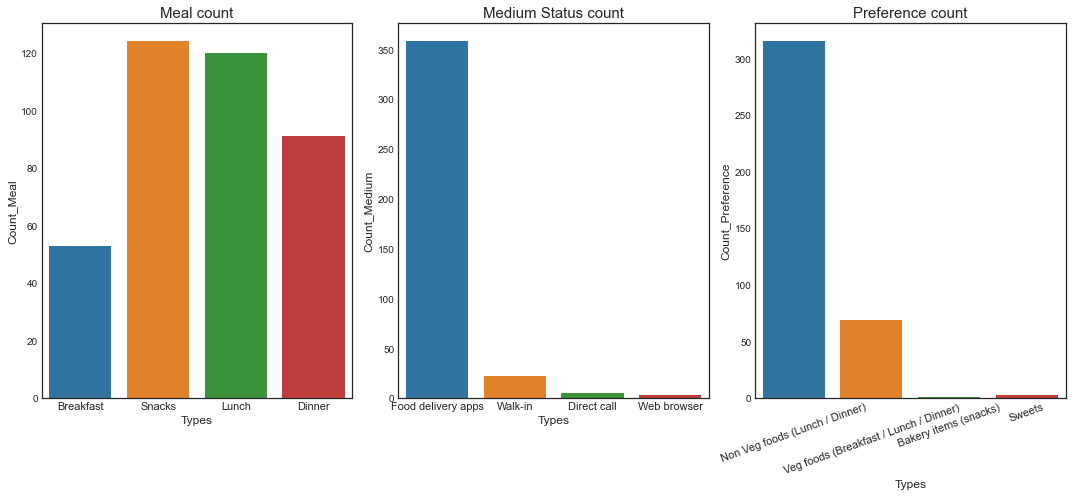

In [13]:
#Setting up the frame
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')

#Meal Countplot
plt.subplot(1,3,1)
ax = sns.countplot(x="Meal(P1)", data=df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)
ax.set_title('Meal count',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count_Meal', fontsize = 12)
plt.tight_layout()

#Medium Countplot
plt.subplot(1,3,2)
ax = sns.countplot(x="Medium (P1)", data=df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)
ax.set_title('Medium Status count',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count_Medium', fontsize = 12)
plt.tight_layout()

#Preference Countplot
plt.subplot(1,3,3)
ax = sns.countplot(x="Perference(P1)", data=df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=20)
ax.set_title('Preference count',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count_Preference', fontsize = 12)
plt.tight_layout()

Based on the first plot, we can see that, generally, people prefer ordering food for lunch and snack items followed by dinner and lowest rate is for ordering breakfast. With this information, restaurants in Bangalore can now order less Breakfast supplies and spend more money on the other supplies. the second plot shows that Nonveg is the most preferred type of meal followed by veg food, While Bakery items and sweets are almost not preferred at all. Restaurants have to invest more in veg food and non veg food and less in sweets and bakery items. 
Most of the preferences belongs to food delivery applications when it comes to medium of purchase. restaurants have to invest more in food delivery apps to increase demand whether by developing their own delivery apps or collaborate with already existing apps.

### Reviews Analysis (converting text reviews to sentiment: satisfied or unsatisfied) :
We used a pre-trained model (trained on the Amazon_Unlocked_Mobile dataset) that analyzes sentiment and outputs 1 if the sentiment is positive and 0 if the sentiment is negative with 93% accuracy. ( please check the sentiment analyser python file, We included it as a “library” to keep the notebook as relevant as possible.

In [14]:
# Vectorize Text to fit it in the model
text=vect.transform(df["Reviews"])
# Make predictions
pred=model.predict(text)
reviews=[]
reviews_labels=[]
for i in range(len(pred)):
    if pred[i]== 1:
        reviews.append(pred[i])
        reviews_labels.append("Satisfied")
    else:
        reviews.append(pred[i])
        reviews_labels.append("Unsatisfied")
# reviews_labels

Since reviews had null values but as strings , we had to take them out manually
We also had a problem where our model predicted null values as satisfied, we'll explore data further to look for a solution

In [15]:
for i in range(len(df["Reviews"])):
    if df["Reviews"][i]=="NIL" or df["Reviews"][i]=="NiL" or df["Reviews"][i]=="Nil" or df["Reviews"][i]=="nil" or df["Reviews"][i]=="No":
        df["Reviews"][i]= 0
df[df["Reviews"]==0]

<ipython-input-15-70496de505c1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Reviews"][i]= 0


,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,0
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,0
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,0
5,27,Female,Married,Employee,More than 50000,Post Graduate,2,12.9299,77.6848,560103,...,Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,0
6,22,Male,Single,Student,No Income,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Unimportant,Important,Very Important,Very Important,Very Important,Very Important,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,24,Female,Single,Student,No Income,Post Graduate,3,12.9828,77.6131,560042,...,Moderately Important,Important,Moderately Important,Slightly Important,Important,Moderately Important,Very Important,Very Important,Yes,0
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,...,Important,Important,Important,Important,Important,Important,Important,Important,Yes,0
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,...,Moderately Important,Very Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Very Important,Very Important,Yes,0
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,...,Important,Very Important,Important,Important,Very Important,Very Important,Very Important,Very Important,Yes,0


Since all of the people who didn't leave a review considered buying again, we will leave it as positive review just like our model predicted it would be, so we'll leave it as it is!

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,1
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,1
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,1
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,1
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,1


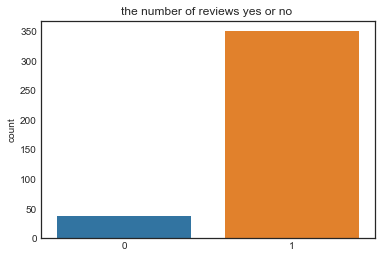

In [16]:
sns.countplot(reviews)
plt.title('the number of reviews yes or no ')
df["Reviews"]=reviews
df.head()

The count of 'Yes' is so much higher than the 'No's
Most of the survey respondents are positive about the service and they have declared they will buy from the same food delivery service

###Final processing:
We finally had to encode our categorical data in order to use it in our models.


In [17]:
y=df["Output"]
X=df[["Age","Family size","Gender","Occupation","Marital Status","Educational Qualifications","Medium (P1)","Meal(P1)","Perference(P1)","Reviews"]]

We have to encode our categorical data in order to use it in our models

In [18]:
# Encoding our variables to be able to use it in our models
gender=preprocessing.LabelEncoder().fit(["Male","Female"])
X["Gender"]=gender.transform(X["Gender"])
occupation=preprocessing.LabelEncoder().fit(["Student","Employee","Self Employeed","House wife"])
X["Occupation"]=occupation.transform(X["Occupation"])
marital=preprocessing.LabelEncoder().fit(["Single","Married","Prefer not to say"])
X["Marital Status"]=marital.transform(X["Marital Status"])
qualification=preprocessing.LabelEncoder().fit(["Graduate","Post Graduate","Ph.D","School","Uneducated"])
X["Educational Qualifications"]=qualification.transform(X["Educational Qualifications"])
medium=preprocessing.LabelEncoder().fit(["Food delivery apps","Walk-in","Direct call","Web browser"])
X["Medium (P1)"]=medium.transform(X["Medium (P1)"])
meal=preprocessing.LabelEncoder().fit(["Snacks","Lunch","Dinner","Breakfast"])
X["Meal(P1)"]=meal.transform(X["Meal(P1)"])
pref=preprocessing.LabelEncoder().fit(["Non Veg foods (Lunch / Dinner)","Veg foods (Breakfast / Lunch / Dinner)","Sweets","Bakery items (snacks)"])
X["Perference(P1)"]=pref.transform(X["Perference(P1)"])

<ipython-input-18-8eeb5123ac29>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Gender"]=gender.transform(X["Gender"])
<ipython-input-18-8eeb5123ac29>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Occupation"]=occupation.transform(X["Occupation"])
<ipython-input-18-8eeb5123ac29>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

### Logistic regression: 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Logistic Regression classifier on training set: 0.83
Accuracy of Logistic Regression classifier on test set: 0.77

Classification Report of Classifier:

              precision    recall  f1-score   support

          No       0.75      0.23      0.35        26
         Yes       0.78      0.97      0.86        71

    accuracy                           0.77        97
   macro avg       0.76      0.60      0.61        97
weighted avg       0.77      0.77      0.73        97



[Text(0, 0.5, 'no'), Text(0, 1.5, 'yes')]

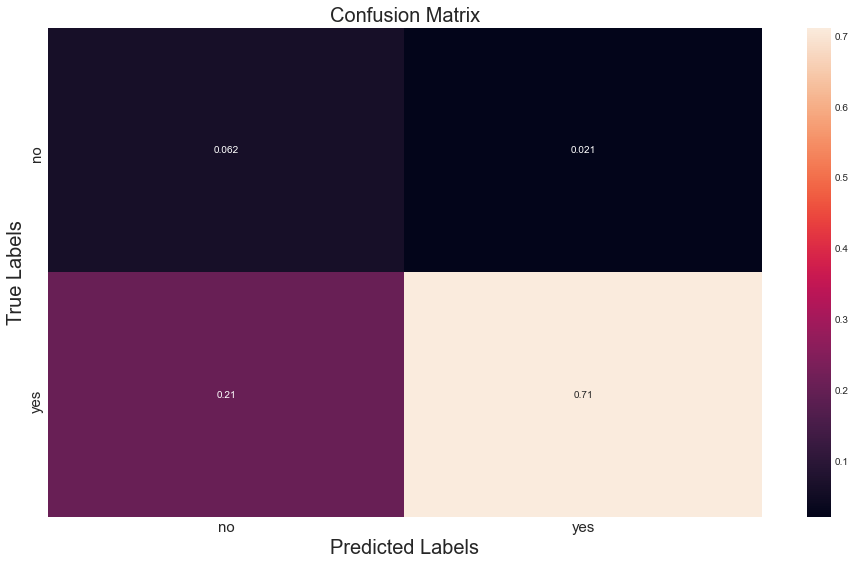

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=5)
lr=LogisticRegression().fit(X_train, y_train)
lr_pred=lr.predict(X_test)
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(lr.score(X_train, y_train)))
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'
     .format(lr.score(X_test, y_test)))
print("\nClassification Report of Classifier:\n")
print(classification_report(y_test, lr_pred))
lr_matrix = confusion_matrix(lr_pred, y_test, normalize='all')
plt.figure(figsize=(16, 9))
ax= plt.subplot()
sns.heatmap(lr_matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels(["no","yes"], size=15)
ax.yaxis.set_ticklabels(["no","yes"], size=15)

the accuracy is 77% which is low. we will try other models in order to improve it.

## 2/ Decision tree: 


Accuracy of Decision Tree classifier on training set: 0.98
Accuracy of Decision Tree classifier on test set: 0.89

Classification Report of Classifier:

              precision    recall  f1-score   support

          No       0.86      0.69      0.77        26
         Yes       0.89      0.96      0.93        71

    accuracy                           0.89        97
   macro avg       0.88      0.83      0.85        97
weighted avg       0.88      0.89      0.88        97



[Text(0, 0.5, 'no'), Text(0, 1.5, 'yes')]

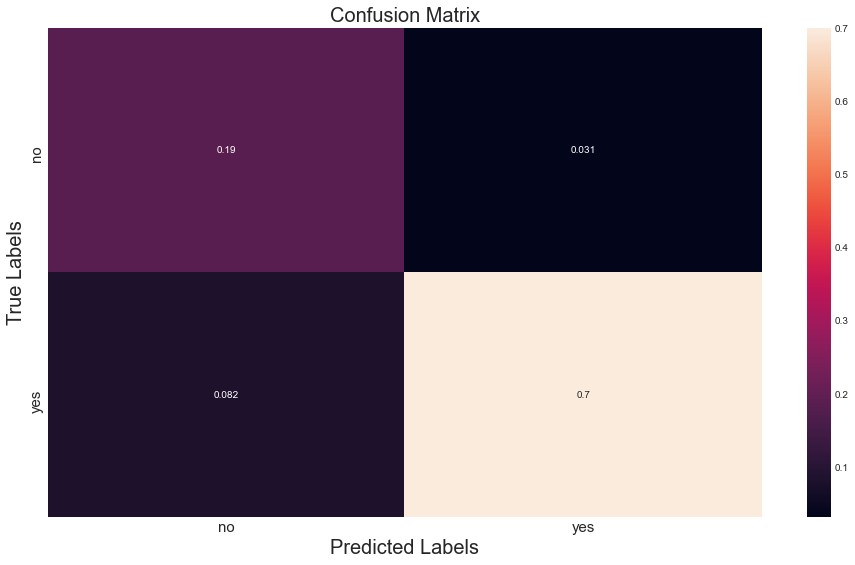

In [20]:
tree = DecisionTreeClassifier().fit(X_train, y_train)
tree_pred=tree.predict(X_test)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(tree.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(tree.score(X_test, y_test)))
print("\nClassification Report of Classifier:\n")
print(classification_report(y_test, tree_pred))
tree_matrix = confusion_matrix(tree_pred, y_test, normalize='all')
plt.figure(figsize=(16, 9))
ax= plt.subplot()
sns.heatmap(tree_matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels(["no","yes"], size=15)
ax.yaxis.set_ticklabels(["no","yes"], size=15)

using decision tree model, we got 85% accuracy  with 9.3% were misclassiied as no (false negative) and 6.2% were incorrectly classiied as yes (false positive).

Decision trees are known for having a tendency to overfit the model to the training
data. For this reason, the error rate reported on training data may be overly
optimistic, and it is especially important to evaluate decision trees on a test dataset.

we use the random forest to check if we can improve results:
## Random forest:

Accuracy of random forest classifier on training set: 0.98
Accuracy of random forest classifier on test set: 0.87

Classification Report of Classifier:

              precision    recall  f1-score   support

          No       0.93      0.54      0.68        26
         Yes       0.85      0.99      0.92        71

    accuracy                           0.87        97
   macro avg       0.89      0.76      0.80        97
weighted avg       0.88      0.87      0.85        97



[Text(0, 0.5, 'no'), Text(0, 1.5, 'yes')]

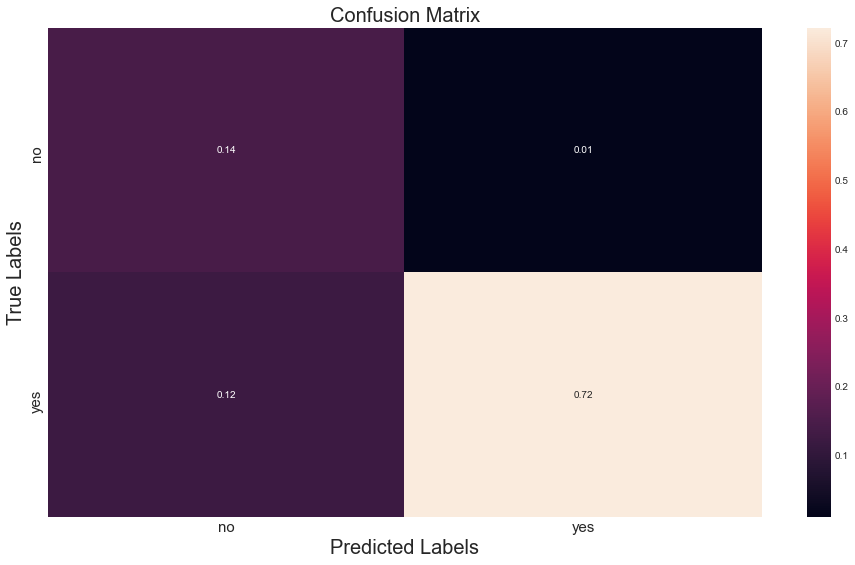

In [21]:
clf = RandomForestClassifier().fit(X_train, y_train)
clf_pred=clf.predict(X_test)
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
print("\nClassification Report of Classifier:\n")
print(classification_report(y_test, clf_pred))
clf_matrix = confusion_matrix(clf_pred, y_test, normalize='all')
plt.figure(figsize=(16, 9))
ax= plt.subplot()
sns.heatmap(clf_matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels(["no","yes"], size=15)
ax.yaxis.set_ticklabels(["no","yes"], size=15)

As expected results improved thanks to random forest power to compensate for decision tree weak points. However, we lost the ability to interpret the result and our accuracy did not improve enough so we will use another model.

## Support Vector Machine:


Accuracy of Support Vector Machine classifier on training set: 0.98
Accuracy of Support Vector Machine classifier on test set: 0.91

Classification Report of Classifier:

              precision    recall  f1-score   support

          No       0.95      0.69      0.80        26
         Yes       0.90      0.99      0.94        71

    accuracy                           0.91        97
   macro avg       0.92      0.84      0.87        97
weighted avg       0.91      0.91      0.90        97



[Text(0, 0.5, 'no'), Text(0, 1.5, 'yes')]

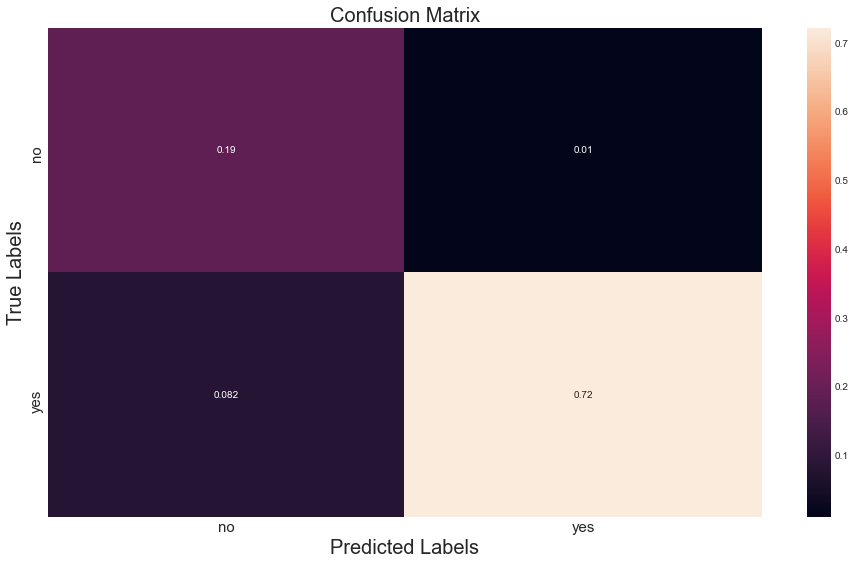

In [22]:
svm = SVC(kernel = "rbf", gamma = 0.1,
                 C = 250).fit(X_train, y_train)
svc_pred = svm.predict(X_test)
print('Accuracy of Support Vector Machine classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of Support Vector Machine classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))
print("\nClassification Report of Classifier:\n")
print(classification_report(y_test, svc_pred))
svc_matrix = confusion_matrix(svc_pred, y_test, normalize='all')
plt.figure(figsize=(16, 9))
ax= plt.subplot()
sns.heatmap(svc_matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels(["no","yes"], size=15)
ax.yaxis.set_ticklabels(["no","yes"], size=15)

Using support vector machine model, we got 91% accuracy with 1% false positive and  8.2% false negative. It was expected as this model is known for its ability to classify non-linear data.


### Final conclusion: Real factors that drive the consumer to decide wether to buy or not:
out of these studied features, we want to determine which ones are more important. to do that, we will visualize our decision tree

This code allows us to vizualize decision tree and the importance of features

In [23]:
import graphviz
from sklearn.tree import export_graphviz
def plot_decision_tree(clf, feature_names, class_names):
    # This function requires the pydotplus module and assumes it's been installed.
    # In some cases (typically under Windows) even after running conda install, there is a problem where the
    # pydotplus module is not found when running from within the notebook environment.  The following code
    # may help to guarantee the module is installed in the current notebook environment directory.
    #
    # import sys; sys.executable
    # !{sys.executable} -m pip install pydotplus

    export_graphviz(clf, out_file="tree.dot", feature_names=feature_names, class_names=class_names, filled = True, impurity = False)
    with open("tree.dot") as f:
        dot_graph = f.read()
    # Alternate method using pydotplus, if installed.
    # graph = pydotplus.graphviz.graph_from_dot_data(dot_graph)
    # return graph.create_png()
    return graphviz.Source(dot_graph)

def plot_feature_importances(clf, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), feature_names)

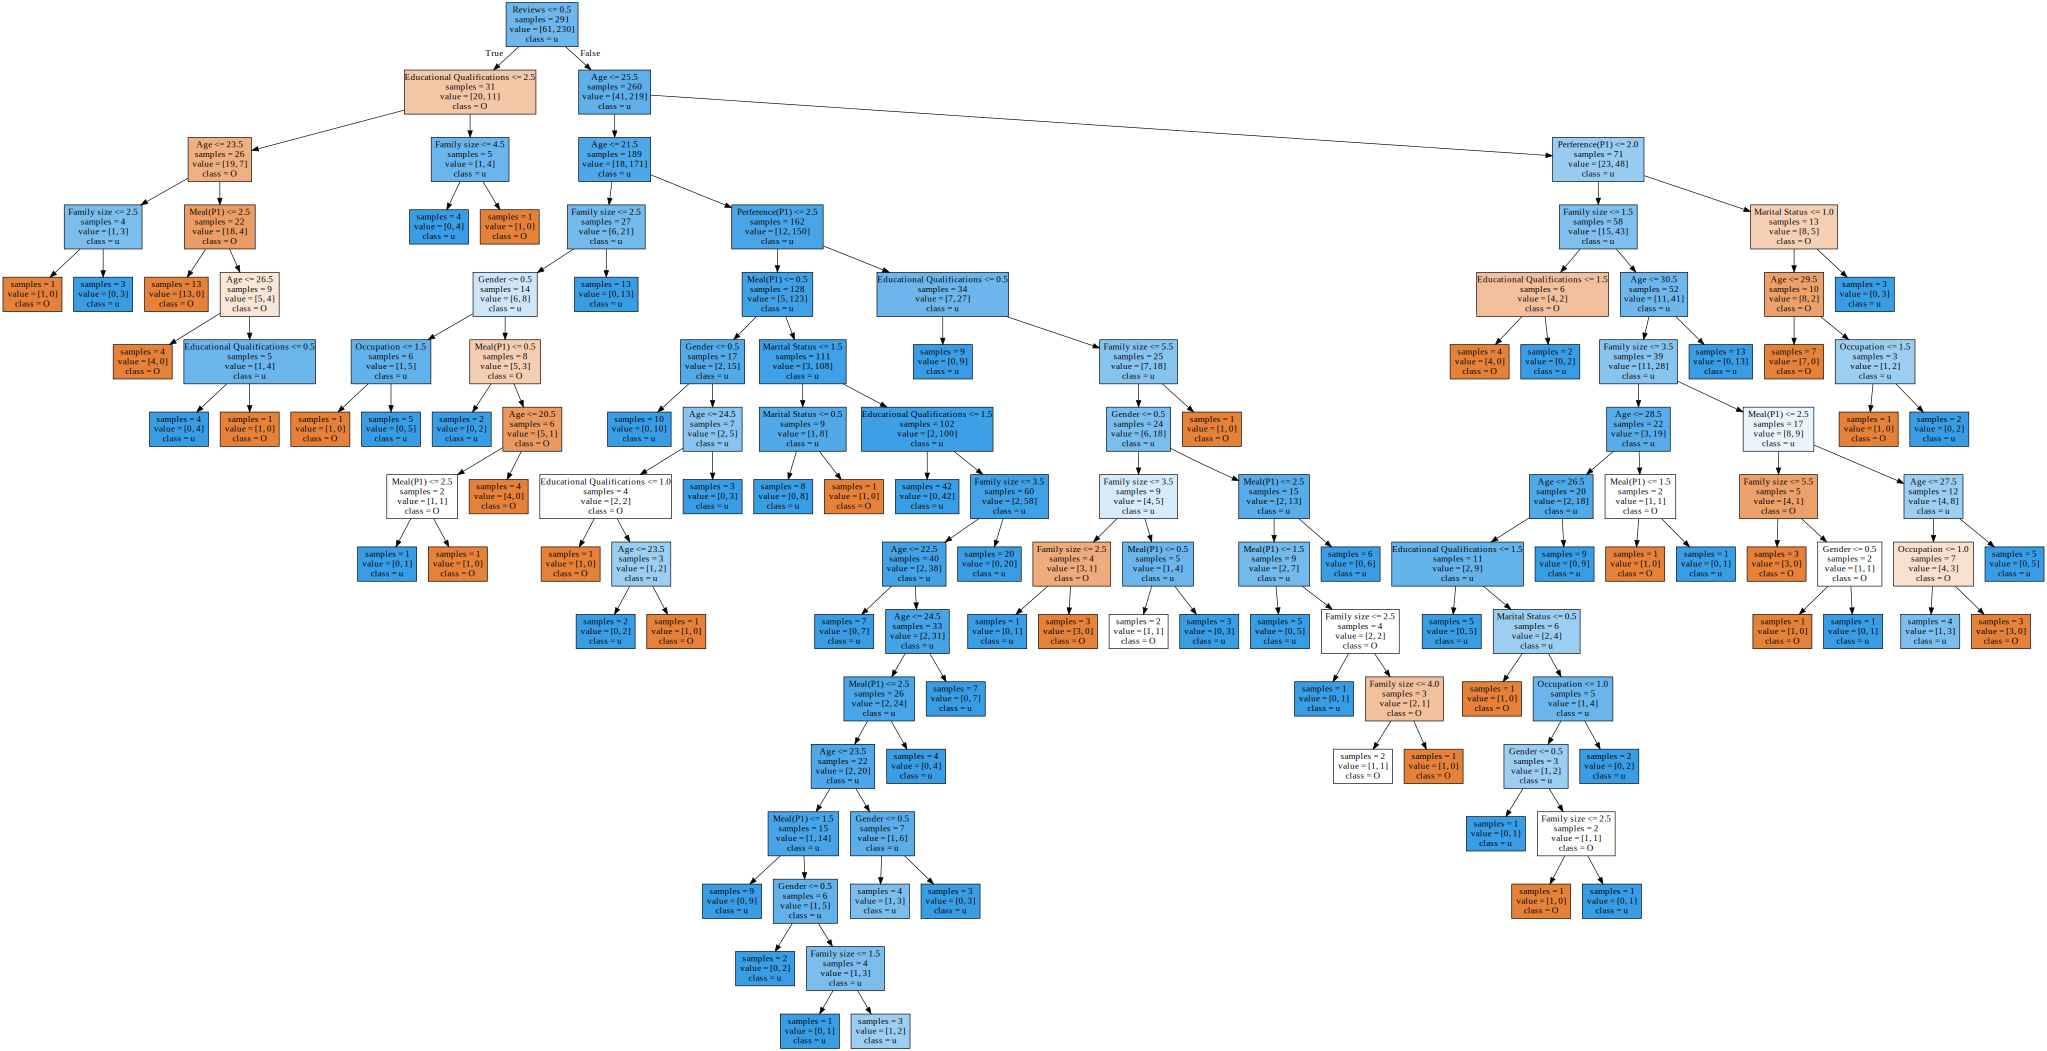

In [24]:
plot_decision_tree(tree, X.columns, "Output")

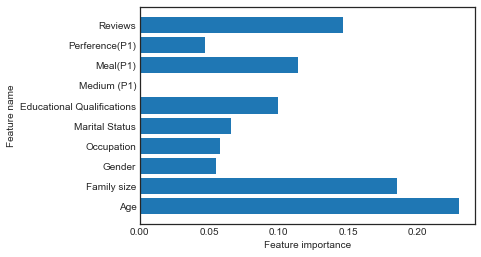

In [25]:
plot_feature_importances(tree, X.columns)

# Section 5: summary:
* To predict customers who will be coming or not, we will use the SVM model since it had
the best accuracy. Misclassifications of this model are more of predicting “no” when a customer
would comeback, which might be costly since there is wasted money on a customer who is already retained. But studies showed that holding a customer costs
much less than losing one (an unsatisfied customer is likely to tell his bad experience to 11 persons). So better be safe than sorry.
* Restaurants have to invest more in snack,dinner and lunch meals , and food delivery apps to increase demand
* We can also conclude that the most important factor determining whether a customer is coming back
or not is age and family size. They are even more important than reviews, the customer own
opinion. This makes our choice of disregarding the survey questions and focusing on the outer
factors a solid choice.
